# Examples for using SweiNet
SweiNet is a DNN that estimates SWS and predictive uncertainty for a single 2D plane of space-time data.

The following examples show how to use this package to run SweiNet for data similar to and different from the training data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from network import get_model, run_model
from utils import imagesc, load_data, preprocess_data
plt.rcParams['image.aspect'] = 'auto'
plt.rcParams['image.interpolation'] = 'none'
plt.rcParams['font.size'] = 14

In [2]:
# Make simulated shear wave data and save them as .mat files
from utils import make_sim_data_1, make_sim_data_2
make_sim_data_1()
make_sim_data_2()

In [3]:
model = get_model(use_ensemble=True)

## Example 1: Data similar to _in vivo_ cervix training data

In [4]:
t, x, displ = load_data('sim_data_1.mat')

In [5]:
input_ = preprocess_data(t, x, displ)
m, sigma = run_model(input_, model)[0]

print(f'Estimated SWS: {m:.2f} +/- {m*np.sinh(sigma):.2f} m/s')
print(f'95% Confidence Interval: [{m/np.exp(1.96*sigma):.2f}, {m*np.exp(1.96*sigma):.2f}] m/s')

Estimated SWS: 2.20 +/- 0.06 m/s
95% Confidence Interval: [2.08, 2.32] m/s


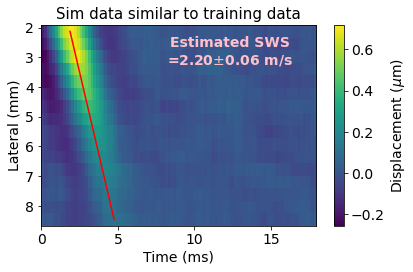

In [6]:
imagesc(t, x, displ)
plt.plot(t[np.argmax(displ[0])] + (x-x[0]) / m, x, 'r')
plt.text(0.55, 0.75, f'Estimated SWS\n={m:.2f}$\pm${m*np.sinh(sigma):.2f} m/s', 
         color='pink', weight='demi', ha='center', transform=plt.gcf().transFigure)
cb = plt.colorbar()
cb.ax.set_ylabel('Displacement ($\mu$m)')
plt.xlabel('Time (ms)')
plt.ylabel('Lateral (mm)')
plt.title('Sim data similar to training data', fontsize=15)
plt.tight_layout()

## Example 2: Data different from training data
* Different data dimensions and spatiotemporal sampling rates
* Different ground truth SWS
* Particle velocity instead of particle displacement
* Different noise texture and wave attenuation

In [7]:
t, x, displ = load_data('sim_data_2.mat')

In [8]:
input_ = preprocess_data(t, x, displ, phase_shift=True, expected_sws=5.0)
m, sigma = run_model(input_, model)[0]
print(f'Estimated SWS: {m:.2f} +/- {m*np.sinh(sigma):.2f} m/s')
print(f'95% Confidence Interval: [{m/np.exp(1.96*sigma):.2f}, {m*np.exp(1.96*sigma):.2f}] m/s')

Estimated SWS: 4.79 +/- 0.79 m/s
95% Confidence Interval: [3.47, 6.61] m/s


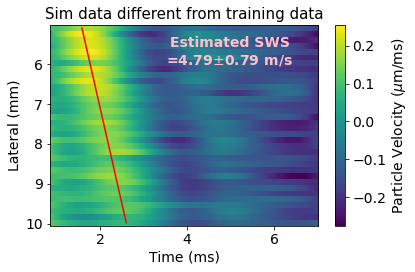

In [9]:
imagesc(t, x, displ)
plt.plot(t[np.argmax(displ[1])] + (x-x[1]) / m, x, 'r')
plt.text(0.55, 0.75, f'Estimated SWS\n={m:.2f}$\pm${m*np.sinh(sigma):.2f} m/s', 
         color='pink', weight='demi', ha='center', transform=plt.gcf().transFigure)
cb = plt.colorbar()
cb.ax.set_ylabel('Particle Velocity ($\mu$m/ms)')
plt.xlabel('Time (ms)')
plt.ylabel('Lateral (mm)')
plt.title('Sim data different from training data', fontsize=15)
plt.tight_layout()